# Generate color legend

In [1]:
import os,sys,inspect
pwdpath = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
# sys.path.insert(0, pwdpath)
from pathlib import Path
sys.path.insert(0, str(Path(pwdpath).parent))
sys.path.insert(0, str(Path(pwdpath).parent / 'train'))

from util.utils_dataset import get_color_encoding

get_color_encoding('openrooms')

OSError: data/openrooms/openrooms_colors.txt not found.

In [2]:
import os, sys
# sys.path.append('./train/utils')
import numpy as np
import imageio
# from utils_vis_seg import read_label_mapping, map_label_image, visualize_label_image, get_color_encoding
import matplotlib.pyplot as plt

import colorsys
colorsys.rgb_to_hsv(1, 2, 3)

import math
from scipy.signal import hilbert

def step (r,g,b, repetitions=1):
    lum = math.sqrt( .241 * r + .691 * g + .068 * b )

    h, s, v = colorsys.rgb_to_hsv(r,g,b)

    h2 = int(h * repetitions)
    lum2 = int(lum * repetitions)
    v2 = int(v * repetitions)

    if h2 % 2 == 1:
        v2 = repetitions - v2
        lum = repetitions - lum

    return (h2, lum, v2)

hilbert((1, 2, 3))

ModuleNotFoundError: No module named 'matplotlib'

# cityscapes

In [42]:
table_props

{'agg_filter': None,
 'alpha': None,
 'animated': False,
 'celld': {(0, 0): <matplotlib.table.CustomCell at 0x7fef98680518>,
  (0, 1): <matplotlib.table.CustomCell at 0x7fef98680668>,
  (0, 2): <matplotlib.table.CustomCell at 0x7fef986807f0>,
  (0, 3): <matplotlib.table.CustomCell at 0x7fef98680978>,
  (0, 4): <matplotlib.table.CustomCell at 0x7fef98680b00>,
  (1, 0): <matplotlib.table.CustomCell at 0x7fef98680c18>,
  (1, 1): <matplotlib.table.CustomCell at 0x7fef98680d68>,
  (1, 2): <matplotlib.table.CustomCell at 0x7fef98680eb8>,
  (1, 3): <matplotlib.table.CustomCell at 0x7fef9868f048>,
  (1, 4): <matplotlib.table.CustomCell at 0x7fef9868f198>,
  (2, 0): <matplotlib.table.CustomCell at 0x7fef9868f2e8>,
  (2, 1): <matplotlib.table.CustomCell at 0x7fef9868f438>,
  (2, 2): <matplotlib.table.CustomCell at 0x7fef9868f588>,
  (2, 3): <matplotlib.table.CustomCell at 0x7fef9868f6d8>,
  (2, 4): <matplotlib.table.CustomCell at 0x7fef9868f828>,
  (3, 0): <matplotlib.table.CustomCell at 0x7fef9

20


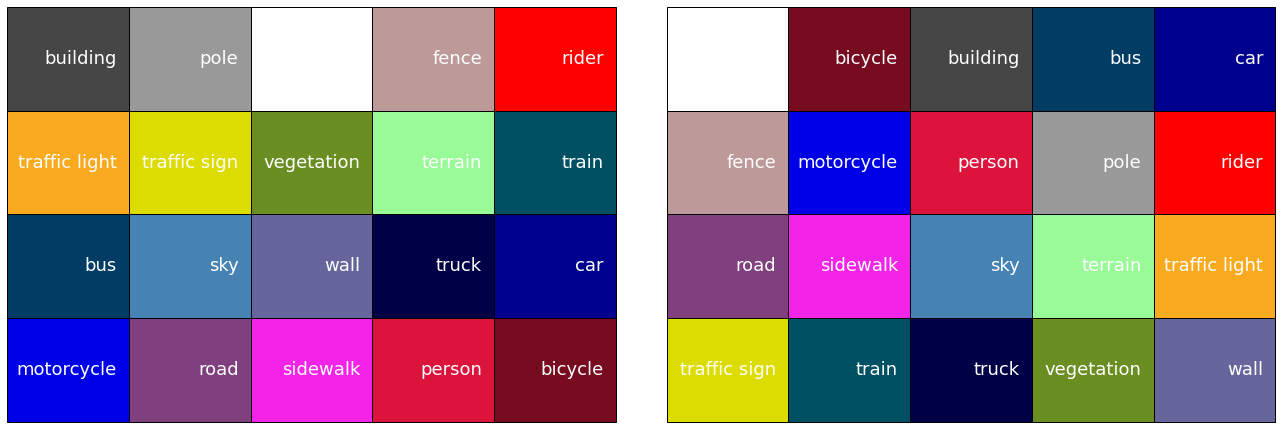

In [59]:
color_dict = get_color_encoding('cityscapes', return_type='dict')

color_dict.update({'': (255, 255, 255)})
print(len(list(color_dict.keys())))
rows = 4
cols = 5

fig = plt.figure(figsize=(20, 6))
ax = plt.subplot(121)

import collections
# color_dict = collections.OrderedDict(sorted(color_dict.items()))
color_dict = collections.OrderedDict({k: v for k, v in sorted(color_dict.items(), key=lambda item: colorsys.rgb_to_hsv(item[1][0], item[1][1], item[1][2]))})
count_key = 0
text_list = [ [] for _ in range(rows) ]
color_list = [ [] for _ in range(rows) ]
for key, color in color_dict.items():
#     print(key, color)
    if key=='unlabeled':
        continue
    text_list[count_key//5].append(key)
    color_list[count_key//5].append((color[0]/255., color[1]/255., color[2]/255.))
    count_key += 1
# fig, ax = plt.subplots(111)
plt.axis('tight')
plt.axis('off')
# ax.title.set_text('Sorted by color')
the_table = ax.table(cellText=text_list, cellColours=color_list, bbox=[0., 0.0, 1.2, 1.2])
the_table.set_fontsize(30)
the_table.scale(1.5, 6)
table_props = the_table.properties()
table_cells = table_props['children']
for cell in table_cells: 
#         cell.get_text().set_fontsize(20)
    cell.get_text().set_color('white')
#     facecolor = cell.properties()['facecolor']
#     cell.get_text().set_color((1.-facecolor[0], 1.-facecolor[1], 1.-facecolor[2]))
# plt.show()

ax = plt.subplot(122)
color_dict = collections.OrderedDict(sorted(color_dict.items()))
# color_dict = collections.OrderedDict({k: v for k, v in sorted(color_dict.items(), key=lambda item: colorsys.rgb_to_hsv(item[1][0], item[1][1], item[1][2]))})
count_key = 0
text_list = [ [] for _ in range(rows) ]
color_list = [ [] for _ in range(rows) ]
for key, color in color_dict.items():
#     print(key, color)
    if key=='unlabeled':
        continue
    text_list[count_key//5].append(key)
    color_list[count_key//5].append((color[0]/255., color[1]/255., color[2]/255.))
    count_key += 1
# fig, ax = plt.subplots(111)
plt.axis('tight')
plt.axis('off')
# ax.title.set_text('Sorted by label')
the_table = ax.table(cellText=text_list, cellColours=color_list, bbox=[0.1, 0.0, 1.2, 1.2])
the_table.set_fontsize(30)
the_table.scale(1.5, 6)
table_props = the_table.properties()
table_cells = table_props['children']
for cell in table_cells: 
#         cell.get_text().set_fontsize(20)
    cell.get_text().set_color('white')
#     facecolor = cell.properties()['facecolor']
#     cell.get_text().set_color((1.-facecolor[0], 1.-facecolor[1], 1.-facecolor[2]))

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

# ,cellColours=colors,
#                      colLabels=columns,loc='center')
#     for key, color in row:
#         print(key, color)
plt.show()

fig.savefig('cityscapes_color_mapping.png', bbox_inches='tight')

In [25]:
text_list

[['building',
  'pole',
  '',
  'fence',
  'rider',
  'traffic light',
  'traffic sign',
  'vegetation',
  'terrain',
  'train',
  'bus',
  'sky',
  'wall',
  'truck',
  'car',
  'motorcycle',
  'road',
  'sidewalk',
  'person',
  'bicycle'],
 ['building',
  'pole',
  '',
  'fence',
  'rider',
  'traffic light',
  'traffic sign',
  'vegetation',
  'terrain',
  'train',
  'bus',
  'sky',
  'wall',
  'truck',
  'car',
  'motorcycle',
  'road',
  'sidewalk',
  'person',
  'bicycle'],
 ['building',
  'pole',
  '',
  'fence',
  'rider',
  'traffic light',
  'traffic sign',
  'vegetation',
  'terrain',
  'train',
  'bus',
  'sky',
  'wall',
  'truck',
  'car',
  'motorcycle',
  'road',
  'sidewalk',
  'person',
  'bicycle'],
 ['building',
  'pole',
  '',
  'fence',
  'rider',
  'traffic light',
  'traffic sign',
  'vegetation',
  'terrain',
  'train',
  'bus',
  'sky',
  'wall',
  'truck',
  'car',
  'motorcycle',
  'road',
  'sidewalk',
  'person',
  'bicycle']]

# ScanNet

## Get colormaps

array([1.+0.57735027j, 2.-1.15470054j, 3.+0.57735027j])

In [122]:
color_dict = get_color_encoding()

import collections
# color_dict = collections.OrderedDict(sorted(color_dict.items()))
# https://www.alanzucconi.com/2015/09/30/colour-sorting/
# color_dict = collections.OrderedDict({k: v for k, v in sorted(color_dict.items(), key=lambda item: colorsys.rgb_to_hsv(item[1][0], item[1][1], item[1][2]))})
color_dict = collections.OrderedDict({k: v for k, v in sorted(color_dict.items(), key=lambda item: step(item[1][0], item[1][1], item[1][2]))})
# color_dict = collections.OrderedDict({k: v for k, v in sorted(color_dict.items(), key=lambda item: hilbert.Hilbert_to_int([int(item[1][0]*255),int(item[1][1]*255),int(item[1][2]*255)]))})

print(len(color_dict))

count_key = 0
text_list = [[], [], [], [], [], [], [], []]
color_list = [[], [], [], [], [], [], [], []]
for key, color in color_dict.items():
#     print(key, color)
    if key=='unlabeled':
        continue
    text_list[count_key//5].append(key)
    color_list[count_key//5].append((color[0]/255., color[1]/255., color[2]/255.))
    count_key += 1

    
# for row_idx, row in enumerate(palette_list):

fig = plt.figure(figsize=(12, 12))
ax = plt.gca()
# fig, ax = plt.subplots(111)
plt.axis('tight')
plt.axis('off')
the_table = ax.table(cellText=text_list, cellColours=color_list, loc='center left')
the_table.set_fontsize(30)
the_table.scale(1.5, 6)

# ,cellColours=colors,
#                      colLabels=columns,loc='center')
#     for key, color in row:
#         print(key, color)
plt.show()

# fig.savefig('a.jpg', bbox_inches='tight')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

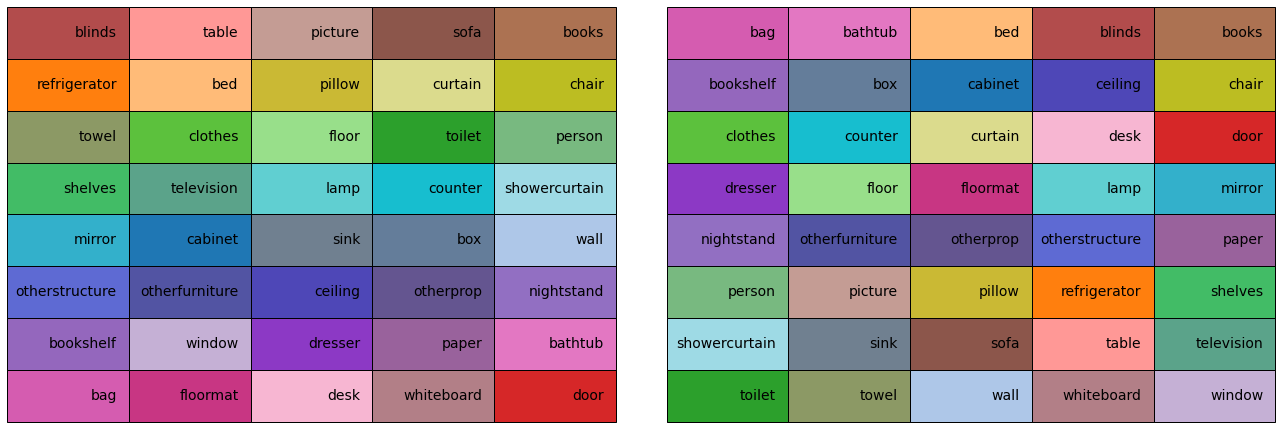

In [108]:


    
# for row_idx, row in enumerate(palette_list):

fig = plt.figure(figsize=(20, 6))
ax = plt.subplot(121)

color_dict = get_color_encoding()
import collections
# color_dict = collections.OrderedDict(sorted(color_dict.items()))
color_dict = collections.OrderedDict({k: v for k, v in sorted(color_dict.items(), key=lambda item: colorsys.rgb_to_hsv(item[1][0], item[1][1], item[1][2]))})
count_key = 0
text_list = [[], [], [], [], [], [], [], []]
color_list = [[], [], [], [], [], [], [], []]
for key, color in color_dict.items():
#     print(key, color)
    if key=='unlabeled':
        continue
    text_list[count_key//5].append(key)
    color_list[count_key//5].append((color[0]/255., color[1]/255., color[2]/255.))
    count_key += 1
# fig, ax = plt.subplots(111)
plt.axis('tight')
plt.axis('off')
# ax.title.set_text('Sorted by color')
the_table = ax.table(cellText=text_list, cellColours=color_list, bbox=[0., 0.0, 1.2, 1.2])
the_table.set_fontsize(30)
the_table.scale(1.5, 6)

ax = plt.subplot(122)
color_dict = get_color_encoding()
import collections
color_dict = collections.OrderedDict(sorted(color_dict.items()))
# color_dict = collections.OrderedDict({k: v for k, v in sorted(color_dict.items(), key=lambda item: colorsys.rgb_to_hsv(item[1][0], item[1][1], item[1][2]))})
count_key = 0
text_list = [[], [], [], [], [], [], [], []]
color_list = [[], [], [], [], [], [], [], []]
for key, color in color_dict.items():
#     print(key, color)
    if key=='unlabeled':
        continue
    text_list[count_key//5].append(key)
    color_list[count_key//5].append((color[0]/255., color[1]/255., color[2]/255.))
    count_key += 1
# fig, ax = plt.subplots(111)
plt.axis('tight')
plt.axis('off')
# ax.title.set_text('Sorted by label')
the_table = ax.table(cellText=text_list, cellColours=color_list, bbox=[0.1, 0.0, 1.2, 1.2])
the_table.set_fontsize(30)
the_table.scale(1.5, 6)

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

# ,cellColours=colors,
#                      colLabels=columns,loc='center')
#     for key, color in row:
#         print(key, color)
plt.show()

fig.savefig('nyu40_color_mapping.jpg', bbox_inches='tight')

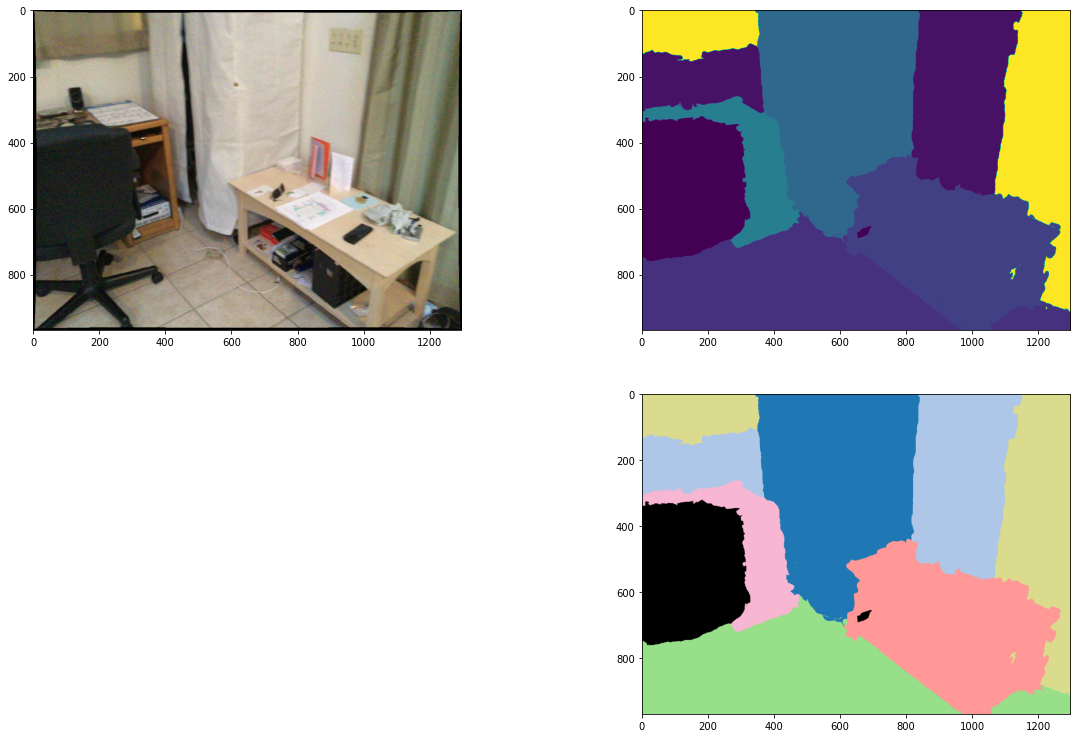

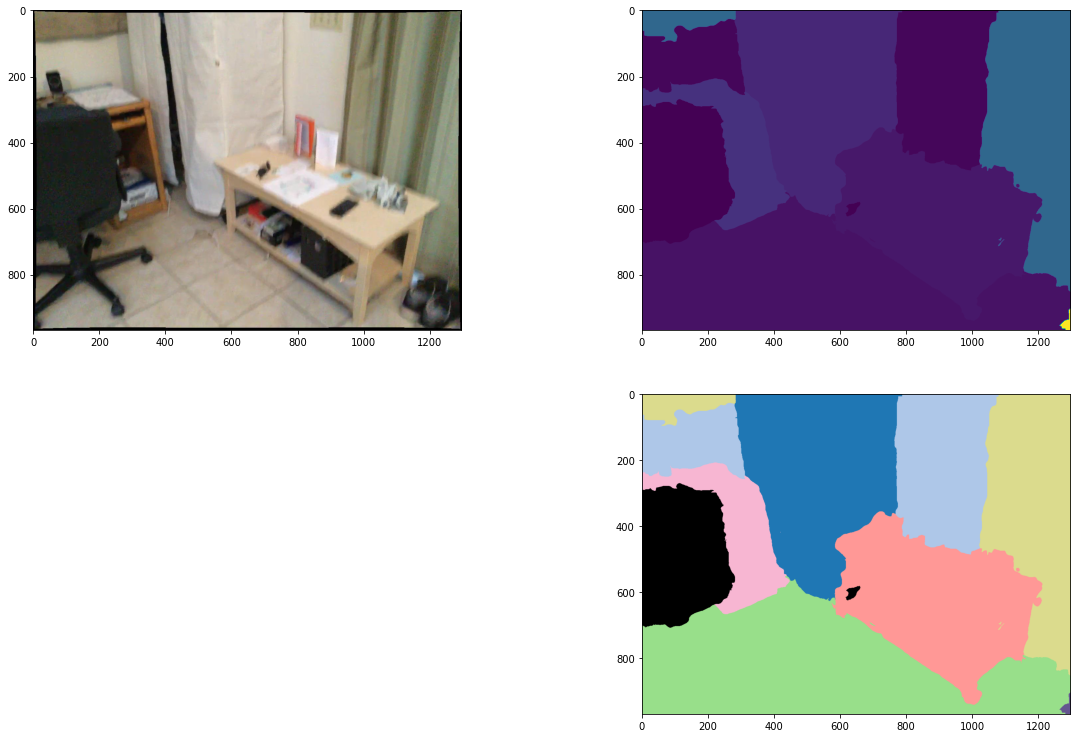

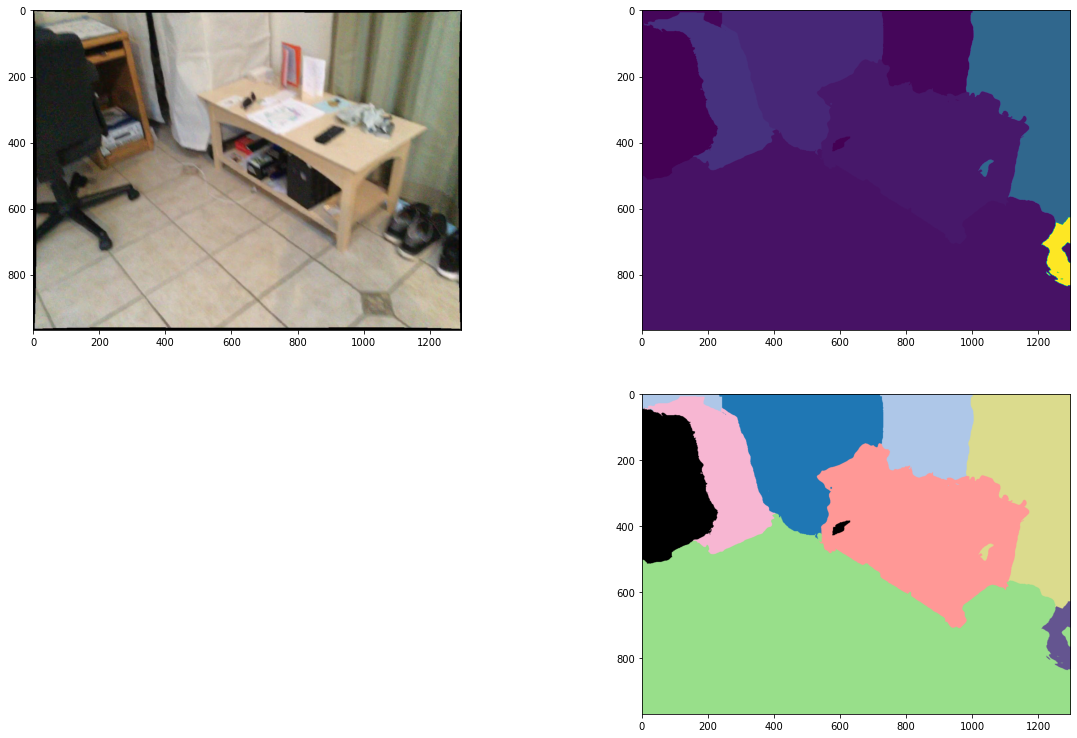

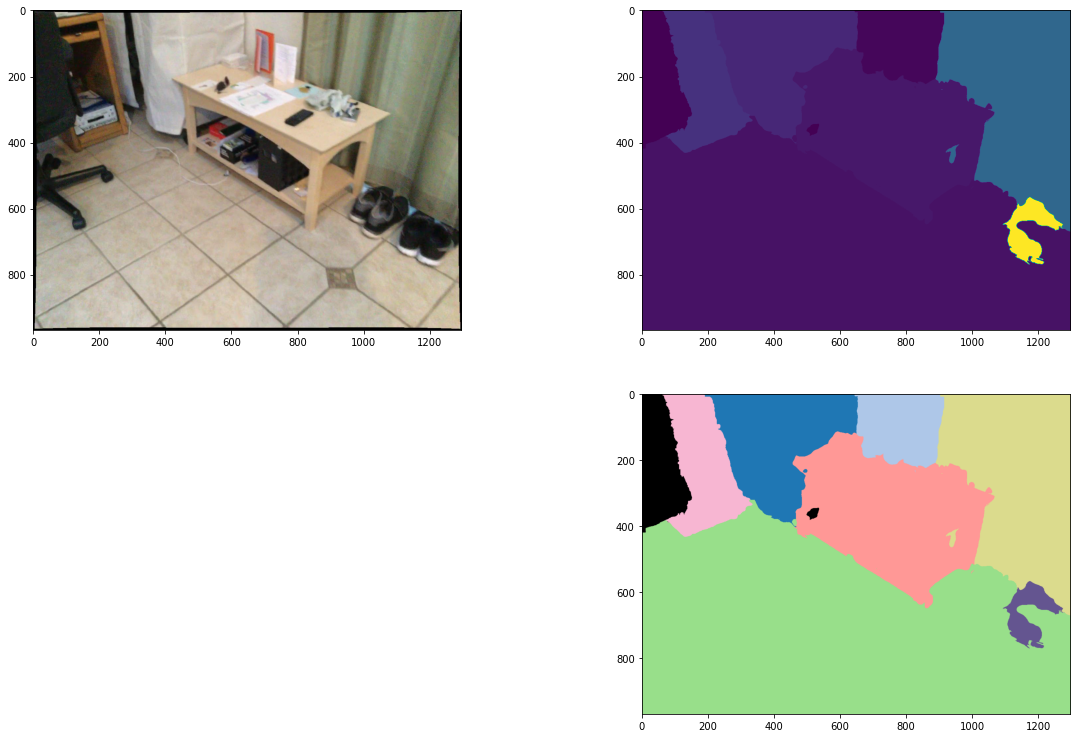

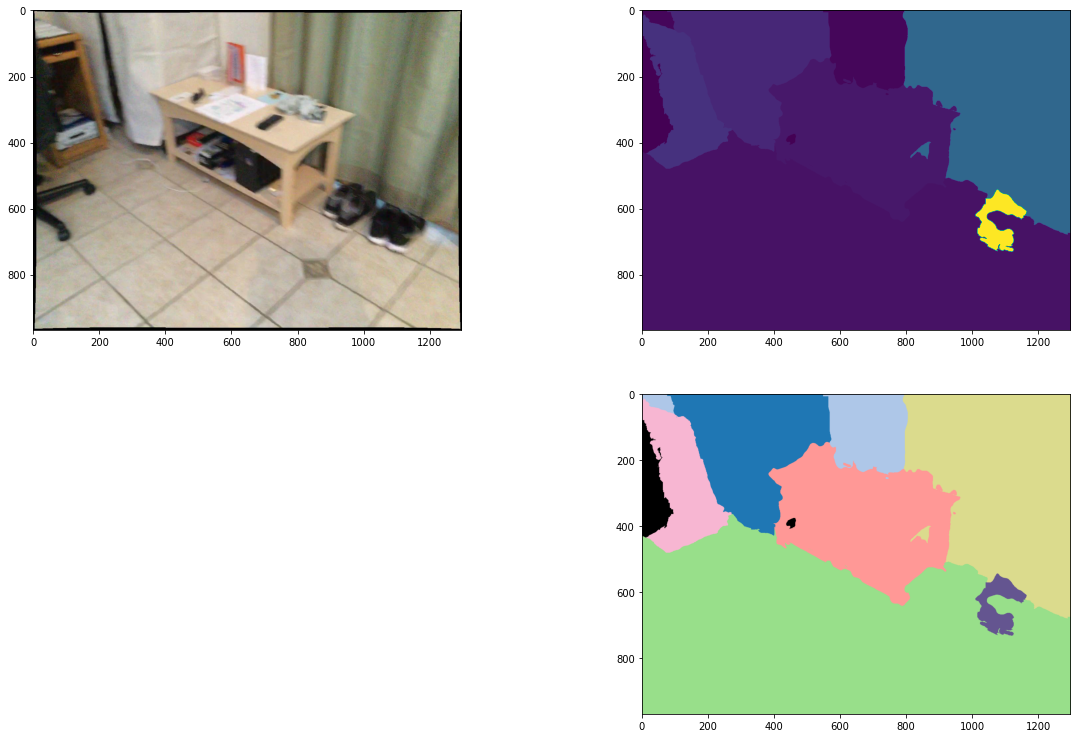

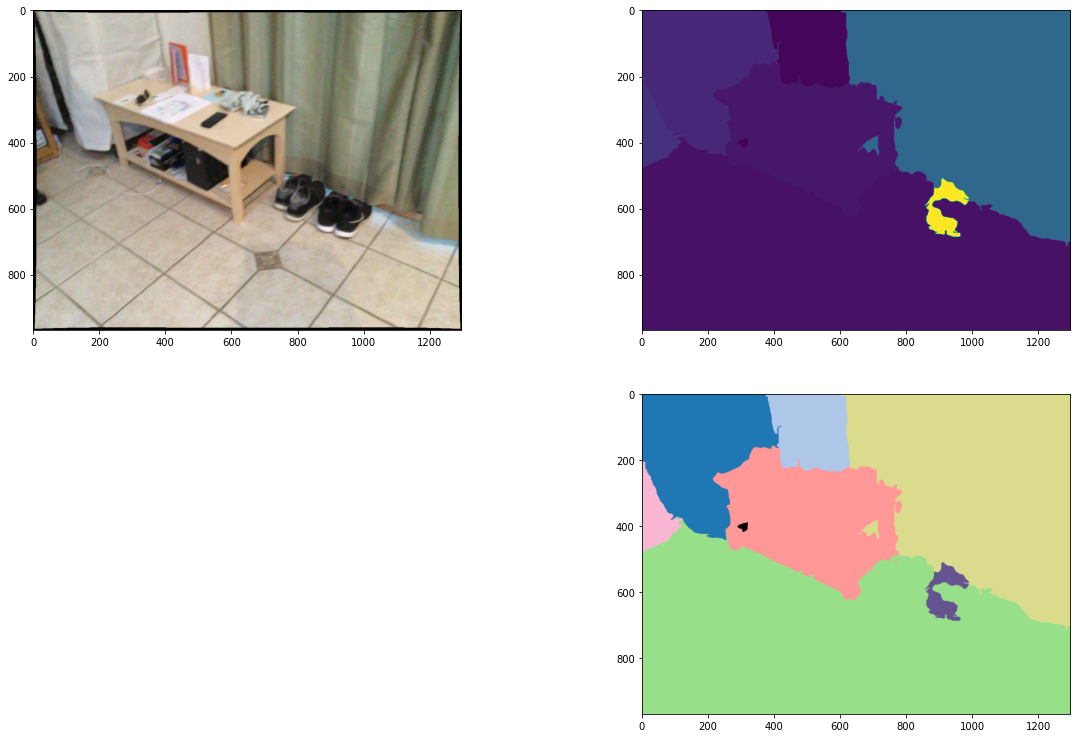

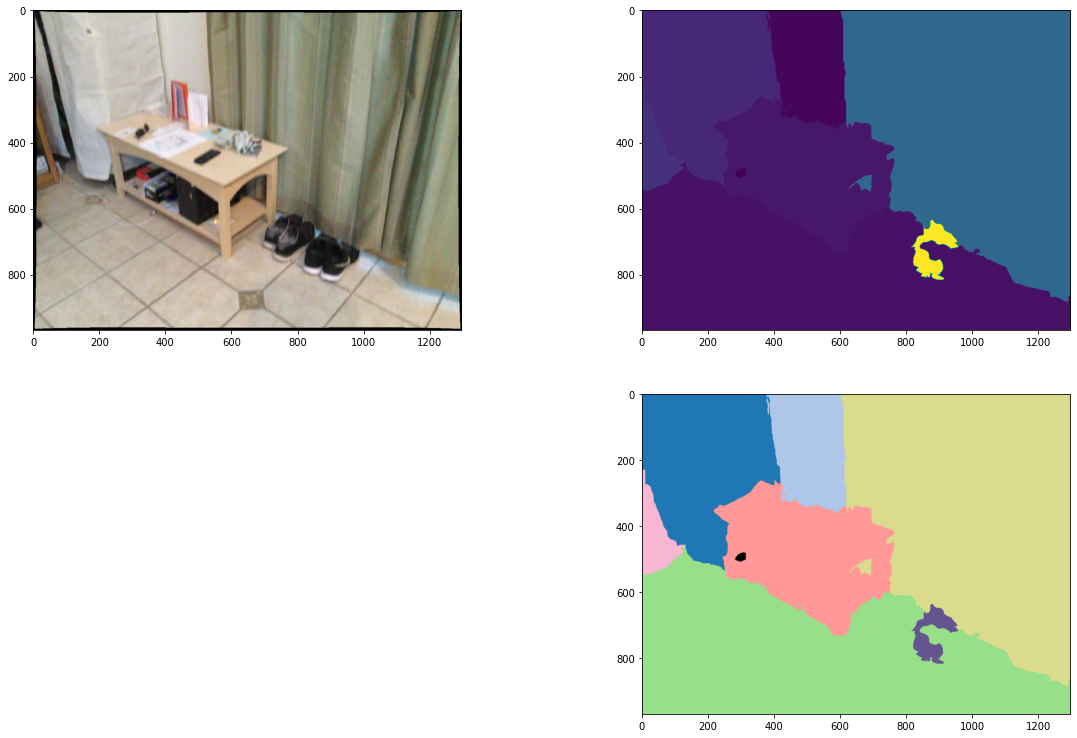

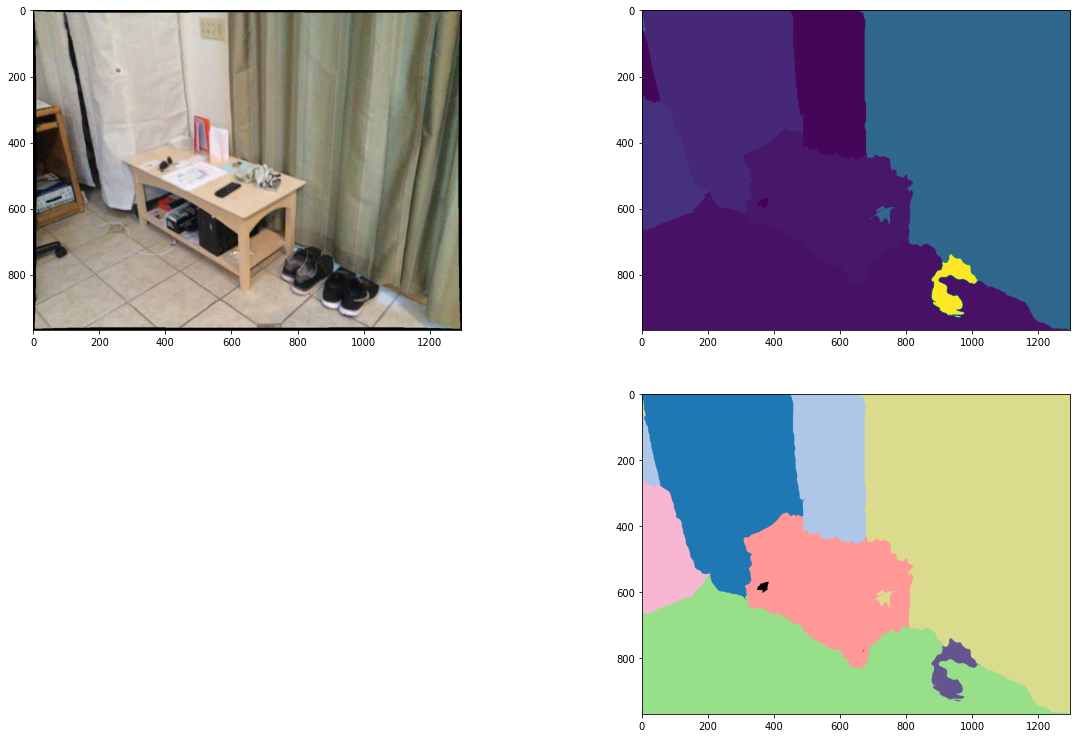

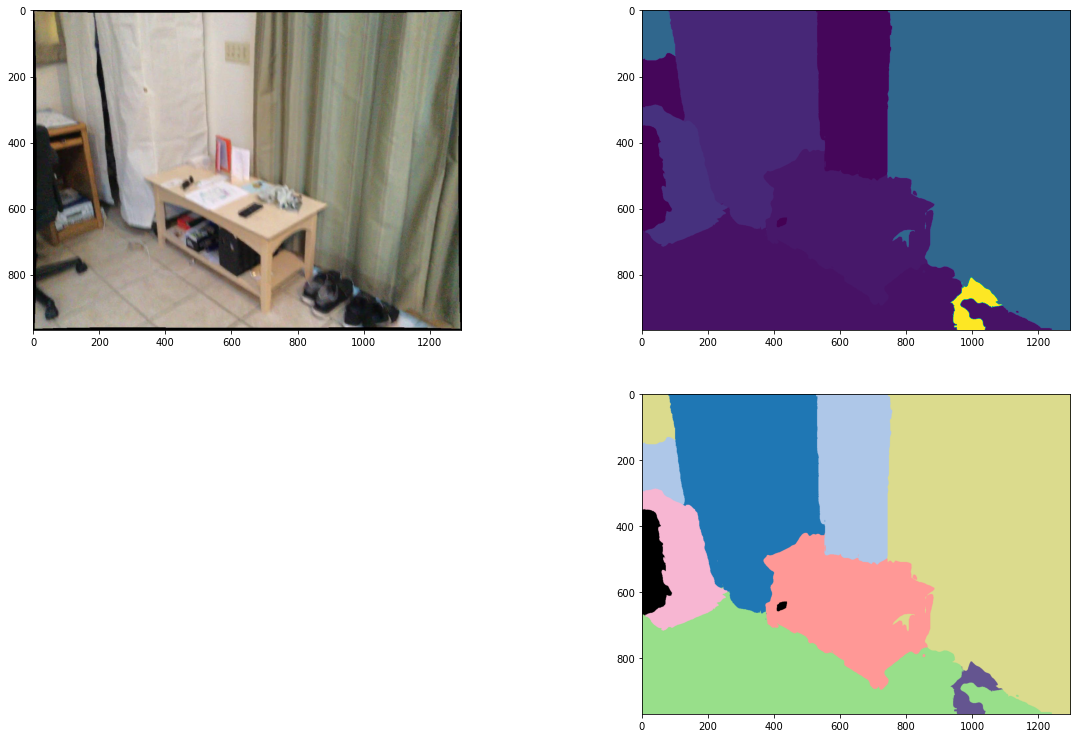

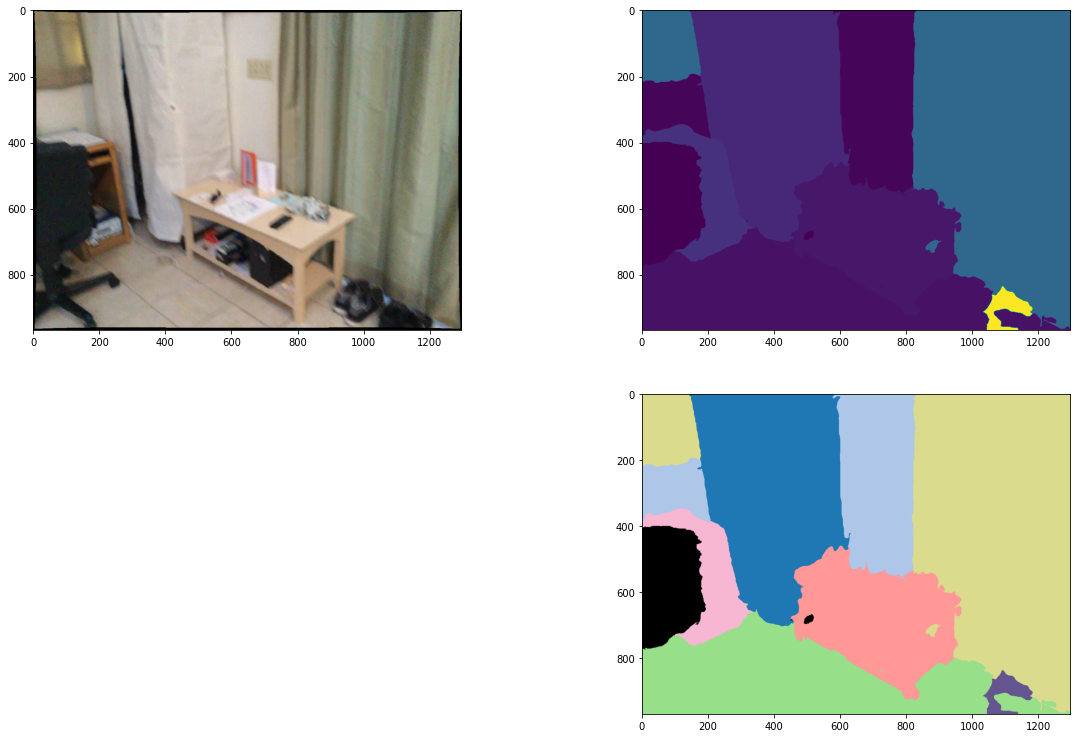

In [1]:
# scannet_path = '/media/ruizhu/RuiT7/ScanNet_sample/scene0000_00/'
scannet_path = '/home/ruizhu/Documents/Training_Datasets/ScanNet_sample/scans_sample/scene0000_00/'
idx = 0


scannet_path = '/home/ruizhu/Documents/Training_Datasets/ScanNet_sample/scans_sample/scene0000_00/'
label_mapping_file = '/home/ruizhu/Documents/Datasets/ScanNet/scannetv2-labels.combined.tsv'

for idx in range(0, 100, 10):
    label_file = scannet_path + 'label-filt/%d.png'%idx

    # https://github.com/ScanNet/ScanNet/blob/2c2f8003e6f4eb122dc96bcb2e072f9813fc73ab/BenchmarkScripts/2d_helpers/convert_scannet_label_image.py
    label_mapping_to_nyu = read_label_mapping(label_mapping_file, label_from='id', label_to='nyu40id')
    image = np.array(imageio.imread(label_file))
    mapped_image = map_label_image(image, label_mapping_to_nyu)
    label_image_vis = visualize_label_image(image=mapped_image, filename=None)

    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(20, 20))

    plt.subplot(321)
    im = plt.imread(scannet_path + 'color/%d.jpg'%idx)
    plt.imshow(im)
    # plt.subplot(322)
    # depth = plt.imread(scannet_path + 'depth/%d.png'%idx)
    # plt.imshow(depth)
    # plt.colorbar()
    # semantic seg
    # plt.subplot(323)
    # label = plt.imread(scannet_path + 'label/%d.png'%idx)
    # plt.imshow(label)
    plt.subplot(322)
    label_filt = plt.imread(scannet_path + 'label-filt/%d.png'%idx)
    plt.imshow(label_filt)
    plt.subplot(324)
    plt.imshow(label_image_vis)
    # instance seg
    # plt.subplot(325)
    # instance = plt.imread(scannet_path + 'instance/%d.png'%idx)
    # plt.imshow(instance)
    # plt.subplot(326)
    # instance_filt = plt.imread(scannet_path + 'instance-filt/%d.png'%idx)
    # plt.imshow(instance_filt)

    # https://github.com/ScanNet/ScanNet/blob/8b1e9e5979216c4c5edccc7a316fafba3e923bab/BenchmarkScripts/util.py

    plt.show()

# InteriorNet

In [ ]:
scannet_path = '/home/ruizhu/Documents/Training_Datasets/ScanNet_sample/scans_sample/scene0000_00/'
idx = 0

# nyud

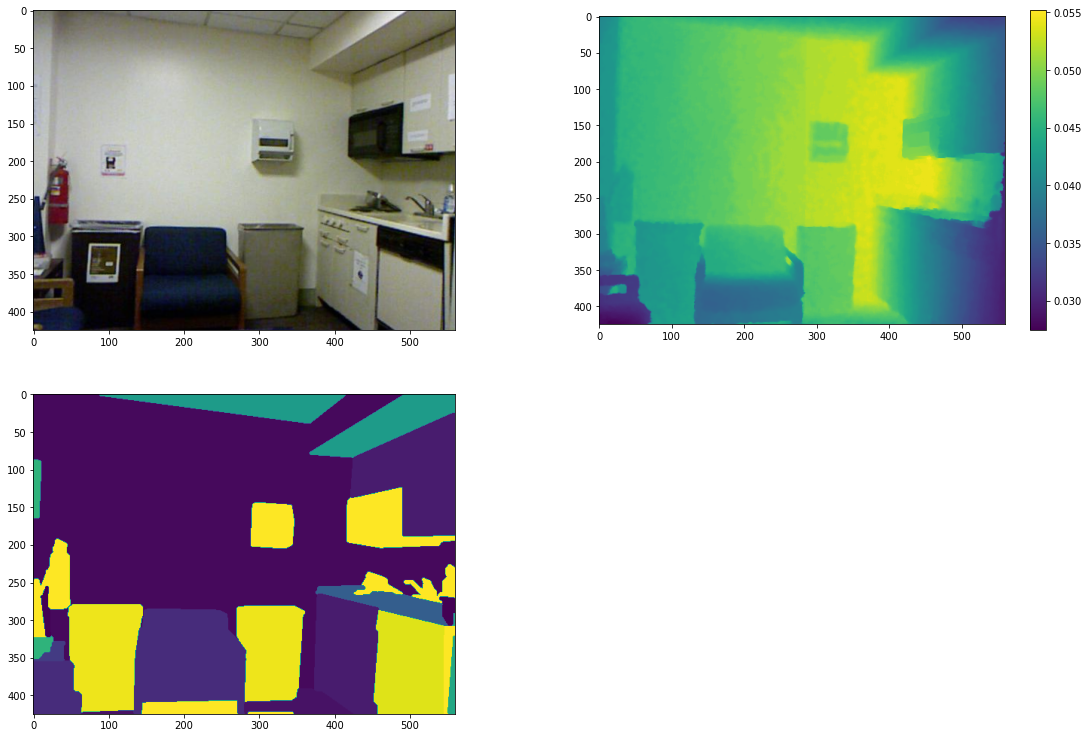

In [20]:
nyud_path = '/media/ruizhu/RuiT7/nyud/'

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 20))

plt.subplot(321)
im = plt.imread(nyud_path + 'data/images/img_5001.png')
plt.imshow(im)
plt.subplot(322)
depth = plt.imread(nyud_path + 'data/depth/img_5001.png')
plt.imshow(depth)
plt.colorbar()
# semantic seg
seg_path = nyud_path + 'segmentation/img_5001.mat'
from scipy.io import loadmat
seg = loadmat(seg_path)['segmentation']
plt.subplot(323)
plt.imshow(seg)
plt.show()